In [16]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 27 11:39:46 2018
@author: altaruru
OpenCV, cropping  images
"""
import cv2
from os import scandir

def cropfile(pathin,pathout, x, y, w, h):
    img = cv2.imread(pathin)
    crop_img = img[y:y+h, x:x+w]
    cv2.imwrite(pathout, crop_img)
    
def ls1(path):    
    return [obj.name for obj in scandir(path) if obj.is_file()]

def splitfilename(filename):
    sname=""
    sext=""
    i=filename.rfind(".")
    if(i!=0):
        n=len(filename)
        j=n-i-1
        sname=filename[0:i]
        sext=filename[-j:]    
    return sext, sname

path="Imagenes/Switch1/"
files=ls1(path)
for file in files:
    filea=path + file # archivo original
    sext, sfilename = splitfilename(file)    
    filec=path+"crop/" + sfilename + "_crop" + ".png" # archivo crop    
    print(filec)
    cropfile(filea, filec, 250, 90, 300,200)

Imagenes/Switch1/crop/webcam-toy-foto1_crop.png
Imagenes/Switch1/crop/webcam-toy-foto10_crop.png
Imagenes/Switch1/crop/webcam-toy-foto2_crop.png
Imagenes/Switch1/crop/webcam-toy-foto3_crop.png
Imagenes/Switch1/crop/webcam-toy-foto4_crop.png
Imagenes/Switch1/crop/webcam-toy-foto5_crop.png
Imagenes/Switch1/crop/webcam-toy-foto6_crop.png
Imagenes/Switch1/crop/webcam-toy-foto7_crop.png
Imagenes/Switch1/crop/webcam-toy-foto8_crop.png
Imagenes/Switch1/crop/webcam-toy-foto9_crop.png


(<matplotlib.image.AxesImage at 0x1cb96b67b50>, Text(0.5, 1.0, '1'))

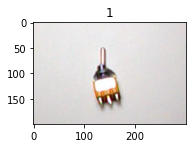

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
imagen = cv2.imread('../Proyecto/Imagenes/Switch1/crop/webcam-toy-foto1_crop.png')
#cv2.imshow('image', imagen)


#blurred_img = cv2.blur(imagen,ksize=(5,5))
#med_val = np.median(imagen) 
#lower = int(max(0 ,0.7*med_val))
#upper = int(min(255,1.3*med_val))
#edges = cv2.Canny(image=imagen, threshold1=255/3,threshold2=255)
plt.figure(1);
plt.subplot(1,2,1); plt.imshow(imagen),plt.title("1")
#plt.subplot(1,2,2); plt.imshow(edges),plt.title("2")




#print(len(contornos1)) #Cantidad de contornos
#print(contornos1[2]) #Donde se encuentra el contorno
#print(hierarchy1) #jerarquiacv2.imshow('imagen',edges)


In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
ima1 = cv2.imread('Imagenes/Switch1/crop/webcam-toy-foto1_crop.png',0)
ima2 = cv2.imread("Imagenes/Switch1/crop/webcam-toy-foto1_crop.png",1)



(<matplotlib.image.AxesImage at 0x1ff2bd6f970>, Text(0.5, 1.0, '2'))

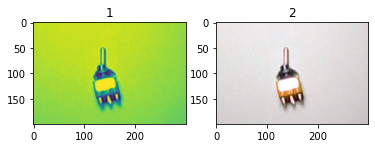

In [2]:
plt.figure(1);
plt.subplot(1,2,1); plt.imshow(ima1),plt.title("1")
plt.subplot(1,2,2); plt.imshow(ima2),plt.title("2")

In [3]:
hist = cv2.calcHist([ima1],[0],None,[256],[0,256])
print(hist.shape)

(256, 1)


([<matplotlib.lines.Line2D at 0x1ff2c106760>], Text(0.5, 1.0, 'Histograma'))

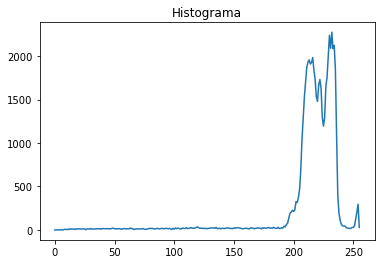

In [4]:
plt.plot(hist), plt.title("Histograma")

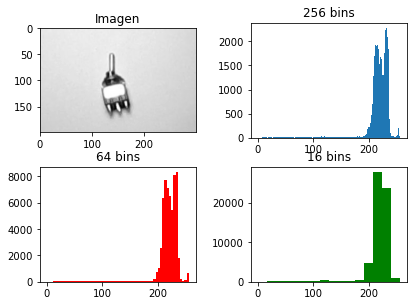

In [5]:
plt.subplot(221), plt.imshow(ima1, cmap='gray'),plt.title('Imagen')
plt.subplot(222),plt.hist(ima1.ravel(),256,[0,256]),plt.title('256 bins')
plt.subplot(223),plt.hist(ima1.ravel(),64,[0,256],facecolor='r'),plt.title('64 bins')
plt.subplot(224),plt.hist(ima1.ravel(),16,[0,256],facecolor='g'),plt.title('16 bins')

plt.subplots_adjust(top=0.95,bottom=0.05,left=0.10,right=0.95,hspace=0.25,wspace=0.35)
plt.show()

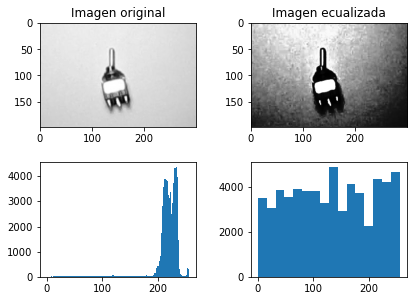

In [6]:
equ = cv2.equalizeHist(ima1)
hist_equ = cv2.calcHist([equ],[0],None,[256],[0,256])

plt.figure(1)
plt.subplot(221), plt.imshow(ima1, cmap='gray'),plt.title('Imagen original')
plt.subplot(222), plt.imshow(equ, cmap='gray'),plt.title('Imagen ecualizada')
plt.subplot(223),plt.hist(ima1.ravel(),128,[0,256])
plt.subplot(224),plt.hist(equ.ravel(),16,[0,256])

plt.subplots_adjust(top=0.95,bottom=0.05,left=0.10,right=0.95,hspace=0.25,wspace=0.35)
plt.show()

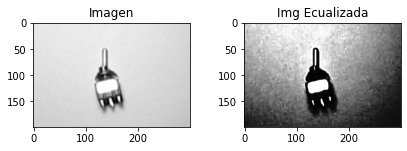

       Brillo: 215.               Brillo: 130.


In [7]:
#Lee tamaño de la imagen
width, height = ima1.shape[:2]
#print('N=', width, 'M=', height)

#Calcula el BRILLO
B1=0; B2=0
for i in range(width):
    for j in range(height):
        B1 = B1 + ima1[i,j]
        B2 = B2 + equ[i,j];
Br1=B1/(width*height)
Br2=B2/(width*height)
#print "Brillo ima1. original = %d. Brillo ima1. ecualizada = %d." %(Br1,Br2)


#VISUALIZACION
plt.figure(1)
plt.subplot(121), plt.imshow(ima1, cmap='gray'), plt.title('Imagen')
plt.subplot(122), plt.imshow(equ, cmap='gray'), plt.title('Img Ecualizada')

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

print ("       Brillo: %d.               Brillo: %d." % (Br1, Br2))

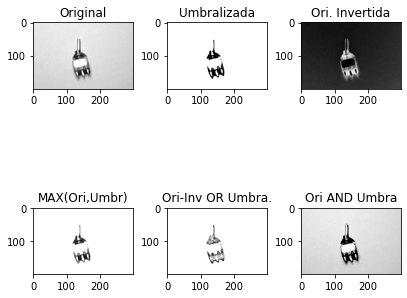

In [8]:
# OPERACIONES PUNTUALES

# SE CARGAN LAS IMAGENES 
#img1 = cv2.imread('Fig/ConceptosBasicos/Imagen_bitmap_1.jpg',0)
img1 = ima1

width, height = img1.shape[:2]
img_umbral = np.zeros((width,height), np.uint8)
img_umbral_inv = np.zeros((width,height), np.uint8)
img_inv = np.zeros((width,height), np.uint8)
img_max = np.zeros((width,height), np.uint8)
img_OR = np.zeros((width,height), np.uint8)
img_AND = np.zeros((width,height), np.uint8)


#UMBRALIZACION
H=128 #Valor de la constante

for i in range(width):
    for j in range(height):
        if img1[i,j] < H : img_umbral[i,j] = 0
        else : img_umbral[i,j] = 255
        img_inv[i,j] = 255 - img1[i,j]
        img_max[i,j] = max(img_umbral[i,j], img1[i,j])
        img_OR[i,j] = img_umbral[i,j] or img_inv[i,j]
        img_AND[i,j] = img_umbral[i,j] and img1[i,j]



#Visualizacion resulatado 
plt.figure(1)
plt.subplot(331), plt.imshow(img1, cmap='gray'), plt.title('Original')
plt.subplot(332), plt.imshow(img_umbral, cmap='gray'), plt.title('Umbralizada')
plt.subplot(333), plt.imshow(img_inv, cmap='gray'), plt.title('Ori. Invertida')
plt.subplot(337), plt.imshow(img_max, cmap='gray'), plt.title('MAX(Ori,Umbr)')
plt.subplot(338), plt.imshow(img_OR, cmap='gray'), plt.title('Ori-Inv OR Umbra.')
plt.subplot(339), plt.imshow(img_AND, cmap='gray'), plt.title('Ori AND Umbra')


# Adjust the subplot layout, because the logit one may take more space
# than usual, due to labels 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

plt.show()

In [16]:
hist = cv2.calcHist([ima1],[0],None,[256],[0,256])


array([[0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [0.000e+00],
       [2.000e+00],
       [1.000e+00],
       [0.000e+00],
       [1.000e+00],
       [7.000e+00],
       [5.000e+00],
       [7.000e+00],
       [3.000e+00],
       [1.300e+01],
       [7.000e+00],
       [1.200e+01],
       [1.000e+01],
       [1.000e+01],
       [6.000e+00],
       [1.300e+01],
       [1.000e+01],
       [1.300e+01],
       [1.000e+01],
       [1.100e+01],
       [1.100e+01],
       [1.200e+01],
       [1.200e+01],
       [3.000e+00],
       [1.200e+01],
       [1.100e+01],
       [1.100e+01],
       [1.500e+01],
       [9.000e+00],
       [1.100e+01],
       [1.200e+01],
       [1.100e+01],
       [1.500e+01],
       [1.200e+01],
       [1.300e+01],
       [1.400e+01],
       [9.000e+00],
       [1.600e+01],
       [1.500e+01],
       [1.500e+01],
       [1.300e+01],
       [1.600e+01],
       [1.200e+01],
       [1.400e+01],
       [1.300e+01],
       [1.900e+01],
       [1.900e+01],


In [20]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 27 11:39:46 2018
@author: altaruru
OpenCV, cropping  images
"""
import cv2
from os import scandir

def cropfile(pathin,pathout, x, y, w, h):
    img = cv2.imread(pathin)
    crop_img = img[y:y+h, x:x+w]
    images.append(crop_img)
    cv2.imwrite(pathout, crop_img)
    
def ls1(path):    
    return [obj.name for obj in scandir(path) if obj.is_file()]

def splitfilename(filename):
    sname=""
    sext=""
    i=filename.rfind(".")
    if(i!=0):
        n=len(filename)
        j=n-i-1
        sname=filename[0:i]
        sext=filename[-j:]    
    return sext, sname

images = []
path="Imagenes/Switch2/"
files=ls1(path)
for file in files:
    filea=path + file # archivo original
    sext, sfilename = splitfilename(file)    
    filec=path+"crop/" + sfilename + "_crop" + ".png" # archivo crop    
    print(filec)
    cropfile(filea, filec, 250, 90, 300,200)

Imagenes/Switch2/crop/webcam-toy-foto11_crop.png
Imagenes/Switch2/crop/webcam-toy-foto12_crop.png
Imagenes/Switch2/crop/webcam-toy-foto13_crop.png
Imagenes/Switch2/crop/webcam-toy-foto14_crop.png
Imagenes/Switch2/crop/webcam-toy-foto15_crop.png
Imagenes/Switch2/crop/webcam-toy-foto16_crop.png
Imagenes/Switch2/crop/webcam-toy-foto17_crop.png
Imagenes/Switch2/crop/webcam-toy-foto18_crop.png
Imagenes/Switch2/crop/webcam-toy-foto19_crop.png


In [15]:
images

[array([[[247, 246, 242],
         [247, 246, 242],
         [247, 246, 242],
         ...,
         [233, 228, 227],
         [233, 228, 227],
         [233, 228, 227]],
 
        [[247, 246, 242],
         [247, 246, 242],
         [248, 247, 243],
         ...,
         [233, 228, 227],
         [233, 228, 227],
         [233, 228, 227]],
 
        [[246, 246, 240],
         [248, 248, 242],
         [248, 248, 242],
         ...,
         [234, 229, 228],
         [233, 228, 227],
         [233, 228, 227]],
 
        ...,
 
        [[217, 218, 216],
         [216, 219, 217],
         [218, 219, 217],
         ...,
         [214, 206, 207],
         [213, 205, 206],
         [212, 204, 205]],
 
        [[218, 217, 213],
         [216, 217, 213],
         [218, 217, 213],
         ...,
         [216, 206, 206],
         [214, 204, 204],
         [212, 202, 202]],
 
        [[220, 219, 215],
         [220, 219, 215],
         [220, 219, 215],
         ...,
         [216, 206, 206],
  

In [16]:
img = cv2.medianBlur(images[0],5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image2, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

plt.show()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-u4kjpz2z\opencv\modules\imgproc\src\thresh.cpp:1676: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::adaptiveThreshold'


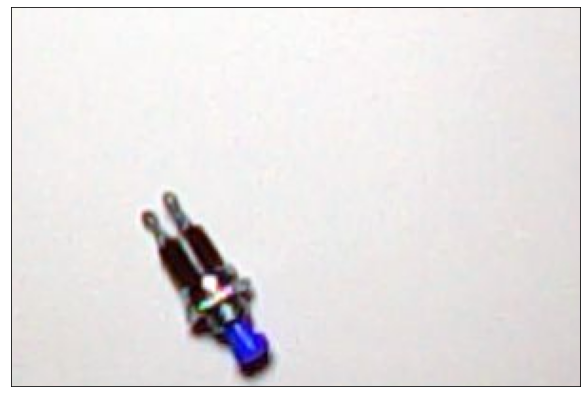

In [19]:
plt.subplot(221),plt.imshow(images[0],'gray')
plt.xticks([]),plt.yticks([])
plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
plt.show()

(<matplotlib.image.AxesImage at 0x1b782894d00>, Text(0.5, 1.0, '2'))

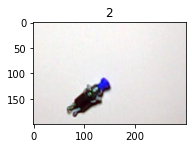

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


ima2 = cv2.imread('Imagenes/Switch2/crop/imagen2.png',1)
plt.figure(1);
plt.subplot(1,2,1); plt.imshow(ima2),plt.title("2")



(<AxesSubplot:title={'center':'Gris'}>,
 Text(0.5, 1.0, 'Gris'))

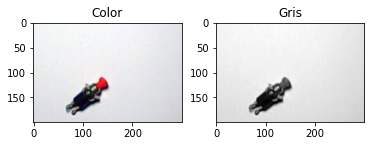

In [3]:
image = cv2.cvtColor(ima2, cv2.COLOR_BGR2RGB )
image2 = cv2.cvtColor(ima2, cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.subplot(221), plt.imshow(image, cmap=plt.cm.gray), plt.title('Color')
plt.subplot(222), plt.imshow(image2, cmap=plt.cm.gray), plt.title('Gris')

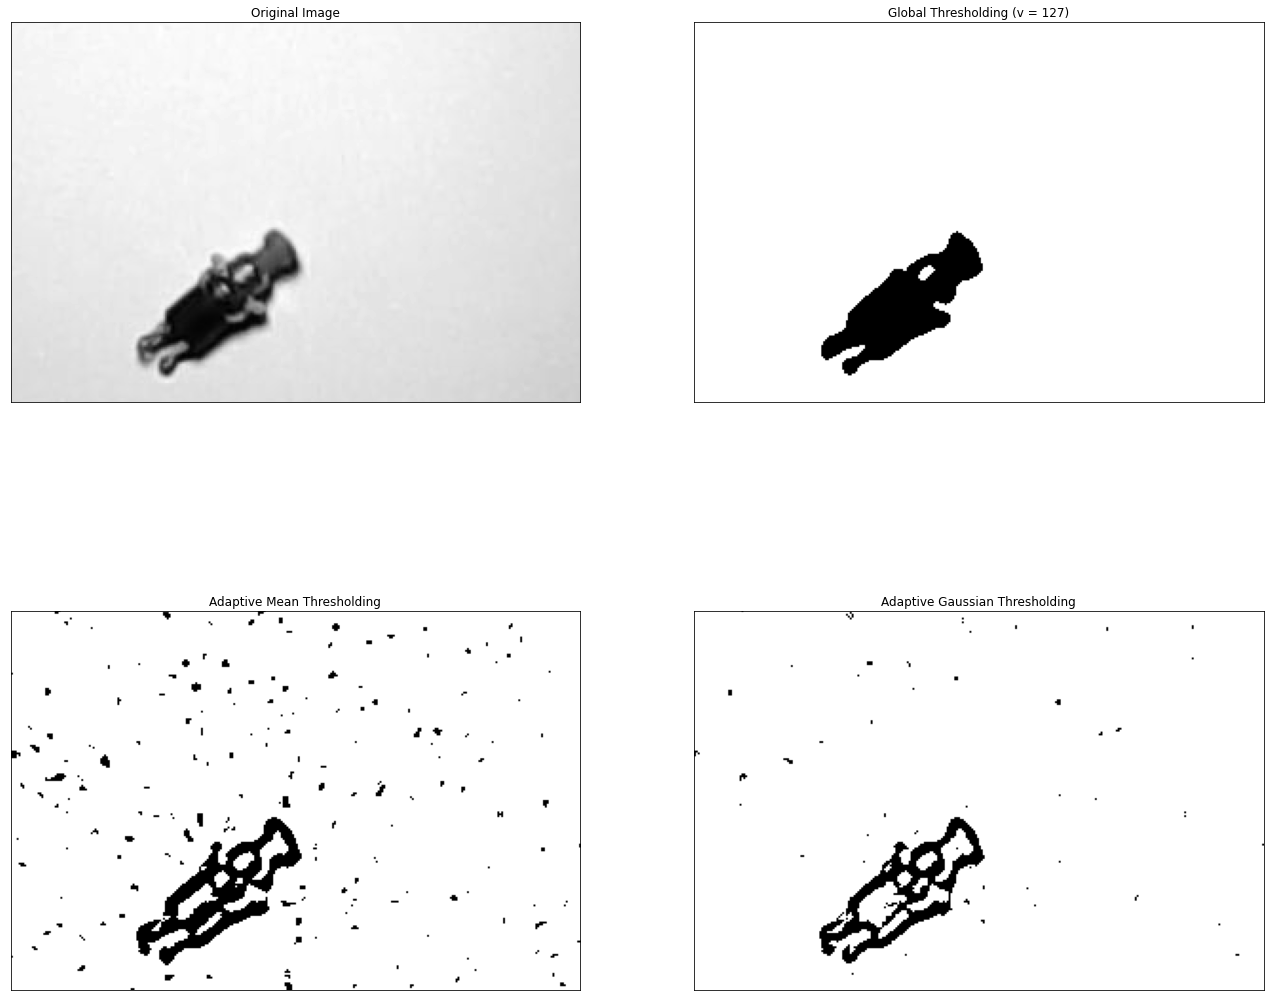

In [4]:
img = cv2.medianBlur(image2,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image2, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

plt.show()

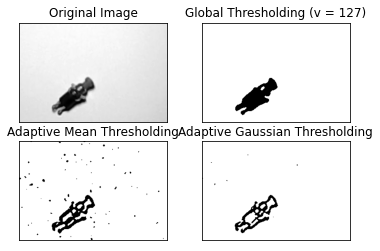

In [5]:

for i in range(4):
    blur= cv2.medianBlur(images[i], 3)
    plt.subplot(2,2,i+1),plt.imshow(blur,'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    

plt.show()

In [6]:
"""
Created on Thu Sep 27 11:39:46 2018
@author: altaruru
OpenCV, cropping  images
"""
import cv2
from os import scandir

def cropfile(pathin,pathout, x, y, w, h):
    img = cv2.imread(pathin)
    crop_img = img[y:y+h, x:x+w]
    cv2.imwrite(pathout, crop_img)
    
def ls1(path):    
    return [obj.name for obj in scandir(path) if obj.is_file()]

def splitfilename(filename):
    sname=""
    sext=""
    i=filename.rfind(".")
    if(i!=0):
        n=len(filename)
        j=n-i-1
        sname=filename[0:i]
        sext=filename[-j:]    
    return sext, sname

path="Imagenes/Switch3/"
files=ls1(path)
for file in files:
    filea=path + file # archivo original
    sext, sfilename = splitfilename(file)    
    filec=path+"crop/" + sfilename + "_crop" + ".png" # archivo crop    
    print(filec)
    cropfile(filea, filec, 250, 90, 300,200)

Imagenes/Switch3/crop/imagen_crop.png
Imagenes/Switch3/crop/webcam-toy-foto21_crop.png
Imagenes/Switch3/crop/webcam-toy-foto22_crop.png
Imagenes/Switch3/crop/webcam-toy-foto23_crop.png
Imagenes/Switch3/crop/webcam-toy-foto24_crop.png
Imagenes/Switch3/crop/webcam-toy-foto25_crop.png
Imagenes/Switch3/crop/webcam-toy-foto26_crop.png
Imagenes/Switch3/crop/webcam-toy-foto27_crop.png
Imagenes/Switch3/crop/webcam-toy-foto28_crop.png
Imagenes/Switch3/crop/webcam-toy-foto29_crop.png
Imagenes/Switch3/crop/webcam-toy-foto30_crop.png
Imagenes/Switch3/crop/webcam-toy-foto31_crop.png
Imagenes/Switch3/crop/webcam-toy-foto32_crop.png


(<matplotlib.image.AxesImage at 0x1b783038430>, Text(0.5, 1.0, '2'))

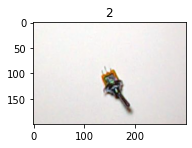

In [7]:
ima2 = cv2.imread('Imagenes/Switch3/crop/imagen_crop.png',1)
plt.figure(1);
plt.subplot(1,2,1); plt.imshow(ima2),plt.title("2")


(<AxesSubplot:title={'center':'Gris'}>,
 Text(0.5, 1.0, 'Gris'))

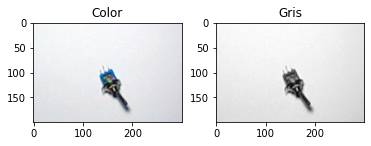

In [8]:
image = cv2.cvtColor(ima2, cv2.COLOR_BGR2RGB )
image2 = cv2.cvtColor(ima2, cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.subplot(221), plt.imshow(image, cmap=plt.cm.gray), plt.title('Color')
plt.subplot(222), plt.imshow(image2, cmap=plt.cm.gray), plt.title('Gris')

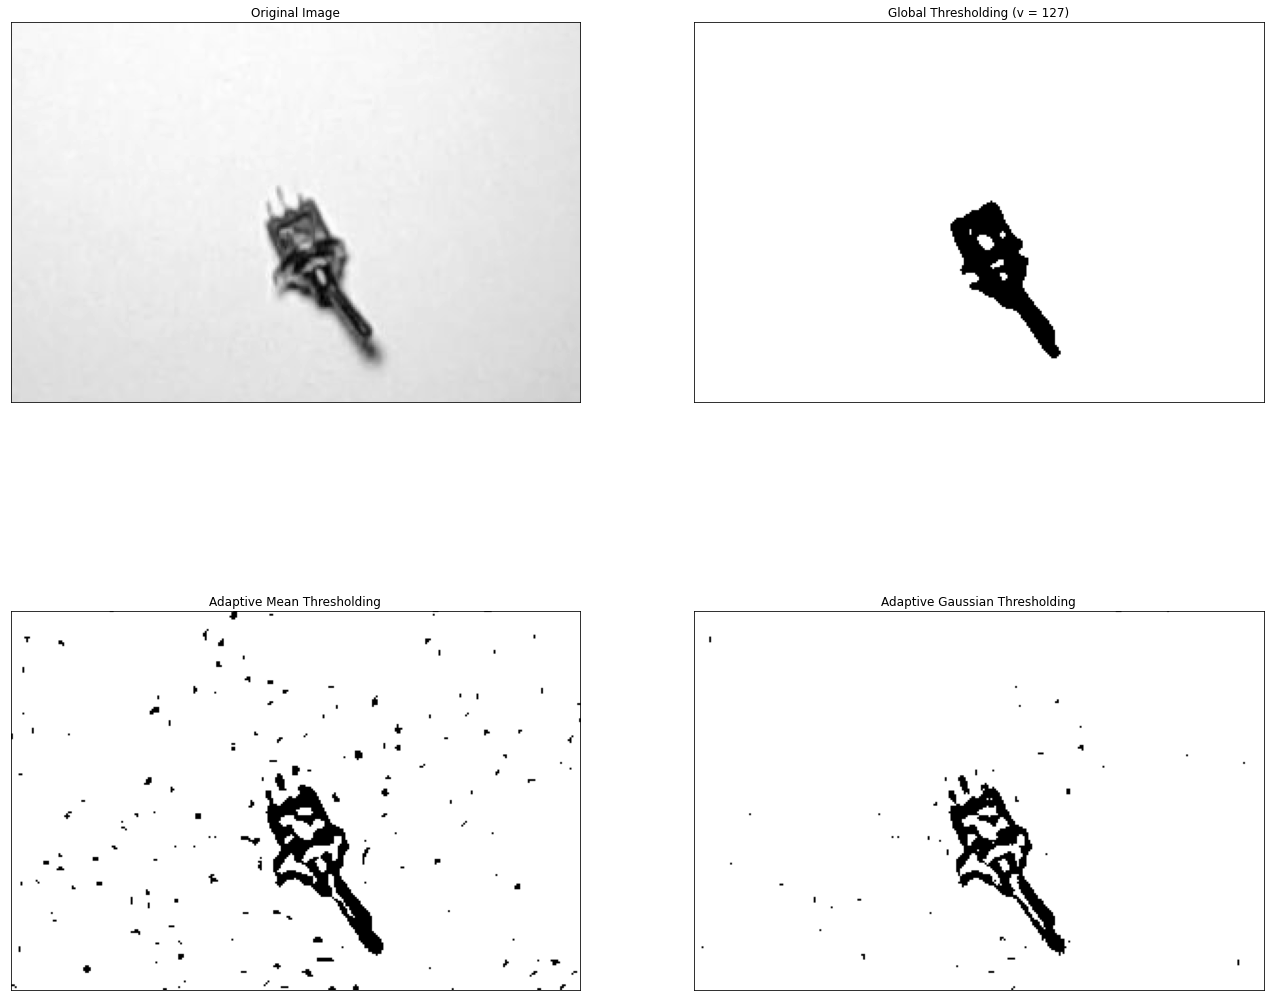

In [9]:
img = cv2.medianBlur(image2,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image2, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)

plt.show()

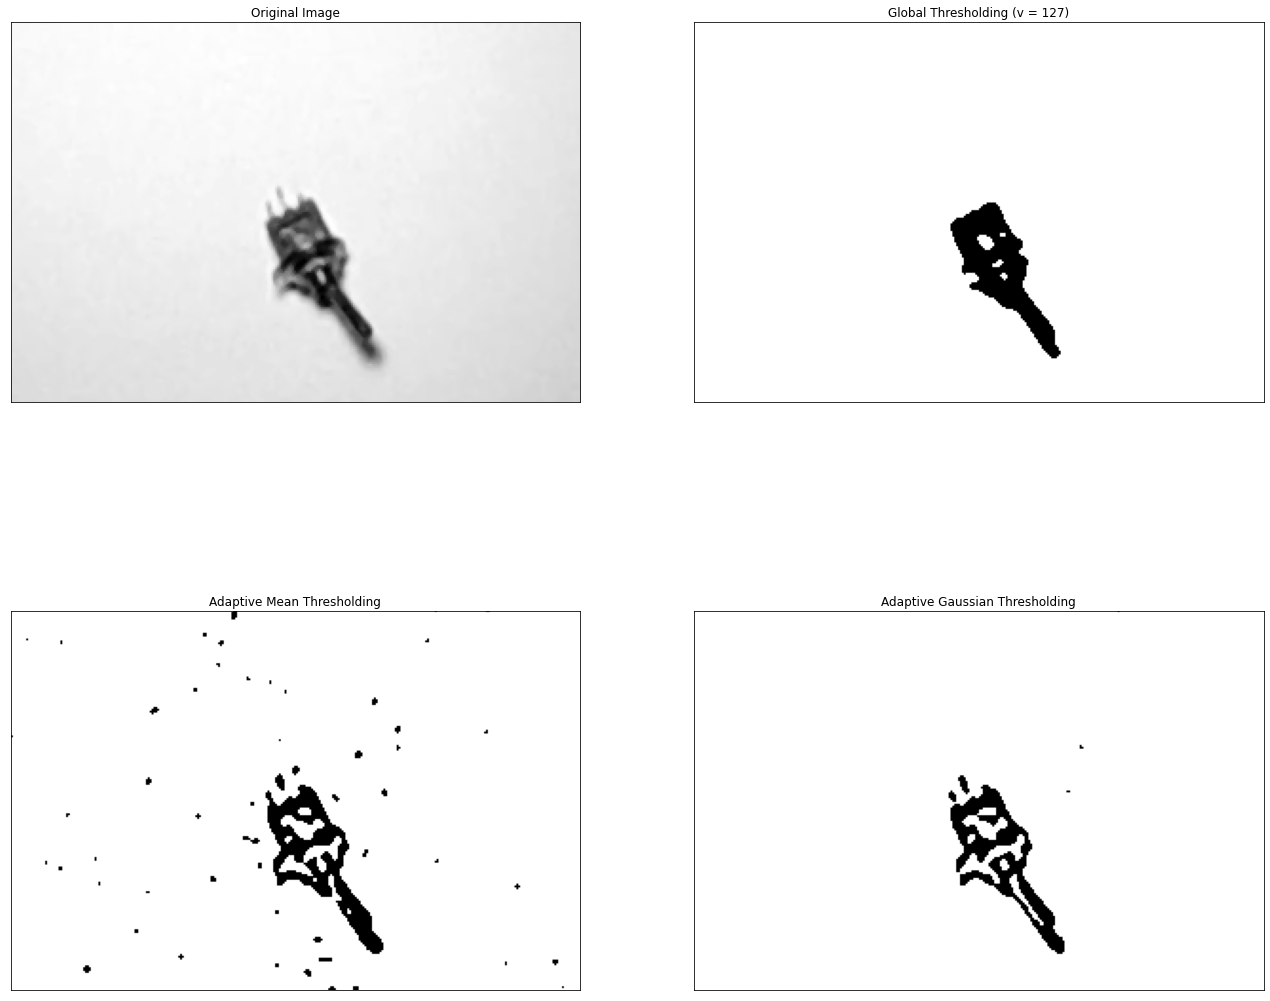

In [11]:

for i in range(4):
    blur= cv2.medianBlur(images[i], 3)
    plt.subplot(2,2,i+1),plt.imshow(blur,'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.subplots_adjust(top=4, bottom=0.1, left=0.10, right=3, hspace=0.1, wspace=0.2)
plt.show()

# Filtro de Salt 